In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
# from sklearn import KNeighboursClassifier

In [ ]:
df = pd.read_csv(r"/content/ratings_Beauty.csv")
# /content/ratings_Beauty.csv
# from zipfile import ZipFile
# zip = ZipFile('/content/ratings_Beauty.csv.zip')
# zip = ZipFile('/content/ratings_Beauty.csv')
# zip.extractall()

In [ ]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
df.columns, df.shape,df.dtypes

(Index(['UserId', 'ProductId', 'Rating', 'Timestamp'], dtype='object'),
 (720616, 4),
 UserId        object
 ProductId     object
 Rating       float64
 Timestamp    float64
 dtype: object)

In [ ]:
df.describe()

,Rating,Timestamp
count,720615.000000,7.206150e+05
mean,4.189016,1.340900e+09
std,1.305149,6.109159e+07
min,1.000000,9.087552e+08
25%,4.000000,1.314662e+09
50%,5.000000,1.361750e+09
75%,5.000000,1.385338e+09
max,5.000000,1.406074e+09


In [ ]:
df.Rating.unique()

array([ 5.,  3.,  4.,  1.,  2., nan])

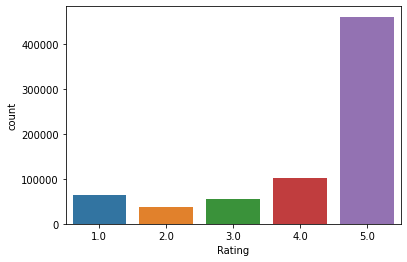

In [ ]:
sns.countplot(data=df,x=df.Rating)
plt.show()

In [ ]:
df.dtypes   

UserId        object
ProductId     object
Rating       float64
Timestamp    float64
dtype: object

## Simple Popularity based Recommendation System

In [ ]:
rating= pd.DataFrame(df.Rating)
top_10= rating.sort_values("Rating", ascending=False)
# print('The following products are recommended'),
top_10.head(10)
# pd.concat(df.ProductId, right_on= df.UserId)

,Rating
0,5.0
1172792,5.0
1172809,5.0
1172808,5.0
1172805,5.0
1172804,5.0
1172802,5.0
1172801,5.0
1172798,5.0
1172795,5.0


In [ ]:
df['Rating'].astype(int),

(0          5
 1          3
 2          5
 3          4
 4          1
           ..
 2023065    5
 2023066    5
 2023067    5
 2023068    5
 2023069    5
 Name: Rating, Length: 2023070, dtype: int64,)

In [ ]:
df.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

## Collaborative Filtering Based Recommendation System


In [ ]:
ratings_new = Rating[Rating.ProductId.isin]

In [ ]:
# rating_explicit = Ratin[df.Rating !=0]
# rating_implicit = df.Rating ==0
df["UserId"].unique()

array(['A39HTATAQ9V7YF', 'A3JM6GV9MNOF9X', 'A1Z513UWSAAO0F', ...,
       'AFPRQT3V8C1U1', 'A1RYQPQ01T5D5R', 'A3MQDRRGC9070R'], dtype=object)

In [ ]:
rating_explicit.head()

0    True
1    True
2    True
3    True
4    True
Name: Rating, dtype: bool

In [ ]:
rating_matrix = df.Rating.pivot(index="UserId", columns="ProductId", values='Rating')

AttributeError: ignored

In [ ]:
def findksmilarusers(UserId, Rating, metric= any, k=any):
    similarities=[]
    indices=[]
    model_knn= NearestNeighbours(metrics=metrics, algorithm="brute")
    model_knn.fit(Rating)
    loc = Rating.index.get_loc(UserId)
    distances, indices= model_knn.kneighbours(Rating.iloc[loc,:].values.reshape(1, -1), n_neighbours= k+1), 
    similarities= 1-distances.flatten()

    return similarities, indices

In [ ]:
def predict_itembased(UserId,ProductId, Rating, metric=any, k= any):
    prediction=wtd_sum=0
    user_loc= df.Rating.get_loc(UserId)
    product_loc= df.Rating(ProductId)
    similarities, indices= findsimilaritems(ProductId, Rating)
    sum_wt= np.sum(similarities)-1
    product=1

    for i in range(0, len(indices.flatten())):
      if indices.flatten()[i] == product_loc:
          continue;
      else:
          product= Rating.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
          wtd_sum = wtd_sum + product
    prediction = int(round(wtd_sum/sum_wt))
    if prediction <=0:
        prediction = 1
    elif prediction >5:
          prediction= 5
    print("predicted rating for user {0}>>> item {1}:{2}".format(UserId,ProductId,prediction))
    return prediction




In [ ]:
df.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp      int64
dtype: object

In [ ]:
prediction= predict_itembased('0205616461', df, 5.0);

AttributeError: ignored